In [13]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [14]:
!pip install pmdarima

In [15]:
monthly_data = pd.read_excel('Forecasting Assignment Data.xlsx',index_col=[1],parse_dates=True)

In [16]:
monthly_data.columns

Index(['Dates', 'Index for Sarimax', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi',
       'UP', 'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh',
       'Gujarat', 'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh',
       'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar',
       'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh',
       'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [17]:
monthly_data=monthly_data.filter(['Gujarat'], axis=1)

In [18]:
monthly_data.tail()

Gujarat
Daily date         
2020-05-14    370.5
2020-05-15    377.4
2020-05-16    379.8
2020-05-17    377.2
2020-05-18    362.5

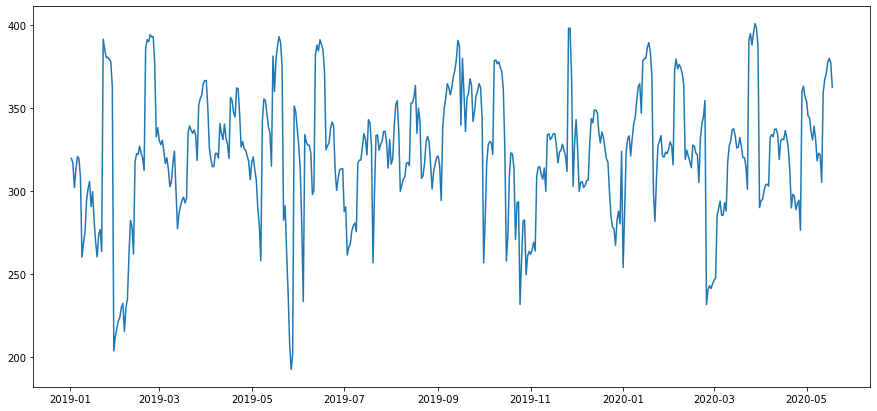

In [19]:
plt.figure(figsize=(15,7))
plt.plot(monthly_data)

In [20]:
day_new=np.arange(1,504)

In [21]:
q_ts = monthly_data

<AxesSubplot:xlabel='Daily date', ylabel='residual'>

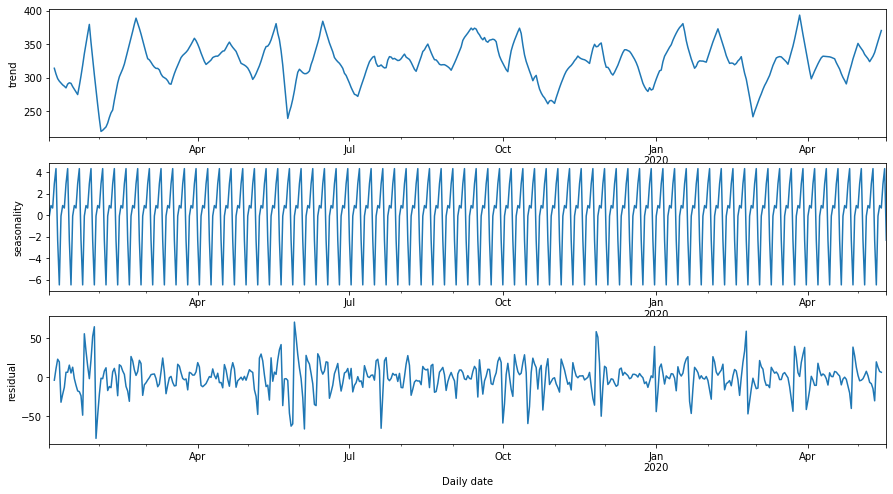

In [22]:
#Checking the trend and seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(q_ts, model='additive')
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result.trend.plot(ax=ax1,ylabel = "trend")
result.seasonal.plot(ax=ax2,ylabel = "seasonality")
result.resid.plot(ax=ax3,ylabel = "residual")

In [23]:
#Checking the stationarity of the ts using Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
res = adfuller(q_ts.values.squeeze(),autolag = 'AIC')
dfoutput = pd.Series(res[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in res[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -7.528141e+00
p-value                        3.638323e-11
#Lags Used                     1.000000e+00
Number of Observations Used    5.010000e+02
Critical Value (1%)           -3.443470e+00
Critical Value (5%)           -2.867326e+00
Critical Value (10%)          -2.569852e+00
dtype: float64


In [24]:
len(q_ts)

503

In [25]:
train_qts=q_ts[:497]
test_qts=q_ts[497:]

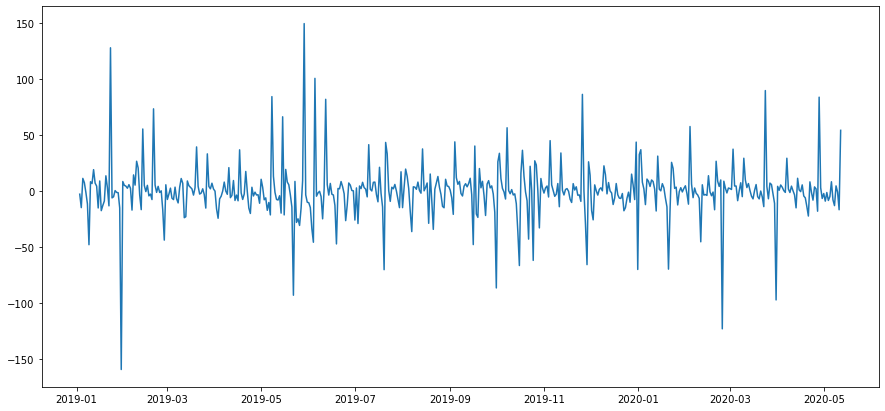

In [26]:
#Differenced version of our ts
lagged_qts = train_qts.diff()
plt.figure(figsize = (15,7))
plt.plot(lagged_qts)

In [28]:
import pmdarima
model = pmdarima.auto_arima(q_ts['Gujarat'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      seasonal = True,
                      max_p = 5,
                      max_q = 5,
                      max_P = 5,
                      max_Q = 5,
                      start_P=0, 
                      D=1, 
                      start_Q = 0,
                      m = 4,
                      stepwise=True,
                      error_action = 'ignore',
                      suppress_warnings = True)
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  503
Model:             SARIMAX(3, 0, 1)x(5, 1, [], 4)   Log Likelihood               -2305.372
Date:                            Wed, 27 Jul 2022   AIC                           4630.743
Time:                                    14:57:32   BIC                           4672.870
Sample:                                         0   HQIC                          4647.275
                                            - 503                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8130      0.051     35.690      0.000       1.713       1.913
ar.L2         -0.8571      0.095   

In [29]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train_qts,order=(3,0,1),seasonal_order=(5,1,[],4))
model_fit = model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
predictions = model_fit.forecast(90)
predictions

2020-05-13    348.750501
2020-05-14    348.768247
2020-05-15    334.307143
2020-05-16    335.748690
2020-05-17    326.477165
                 ...    
2020-08-06    328.840407
2020-08-07    319.003482
2020-08-08    328.274798
2020-08-09    322.113427
2020-08-10    328.843116
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [31]:
next_90_predictions = np.array(predictions)

In [32]:
next_90_predictions

array([348.75050091, 348.76824742, 334.30714265, 335.74868966,
       326.47716508, 332.22570673, 322.96096144, 327.29802149,
       318.2998925 , 333.71443998, 324.85577378, 330.86929931,
       324.99380031, 328.21597615, 319.0647515 , 325.56834708,
       319.94372365, 326.51608878, 316.58672648, 325.12391047,
       320.33544113, 326.09909148, 315.35391217, 330.81835896,
       324.00442849, 330.18388912, 320.07973065, 327.71435878,
       321.23936459, 328.45886441, 318.98957563, 327.52266572,
       321.19016981, 329.06307558, 319.4751034 , 328.41347719,
       322.42972736, 328.60600222, 318.87014186, 327.87792107,
       321.86177289, 328.56163418, 318.67158995, 328.13317567,
       322.11191783, 328.71553812, 318.74550424, 328.77415842,
       322.48035001, 329.16701364, 319.31590535, 328.23857587,
       322.0225677 , 328.86046641, 319.08121908, 328.22998747,
       322.05184905, 328.89711025, 319.08565122, 328.31876715,
       322.18325155, 328.81458216, 318.97962982, 328.23

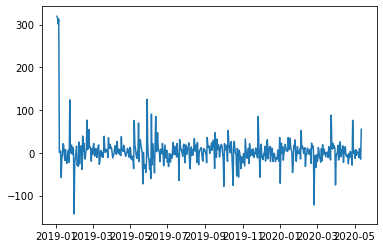

In [33]:
plt.plot(model_fit.resid)

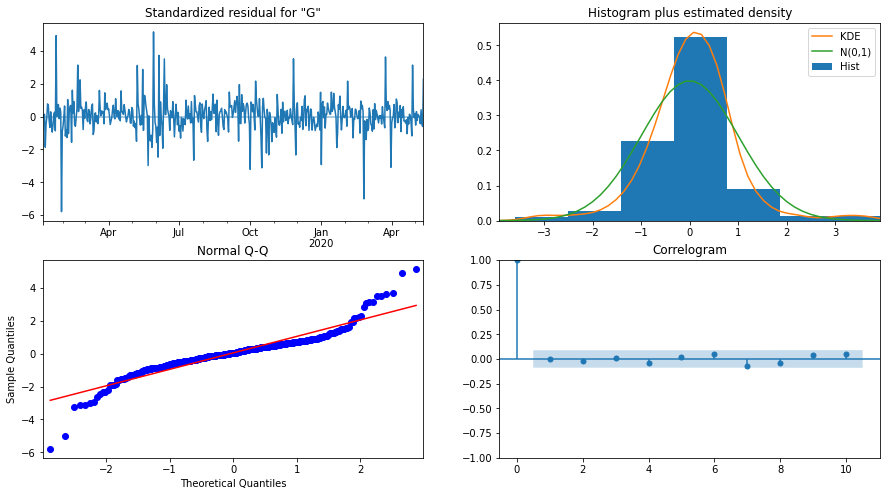

In [34]:
fig = model_fit.plot_diagnostics(figsize = (15,8))
plt.show()

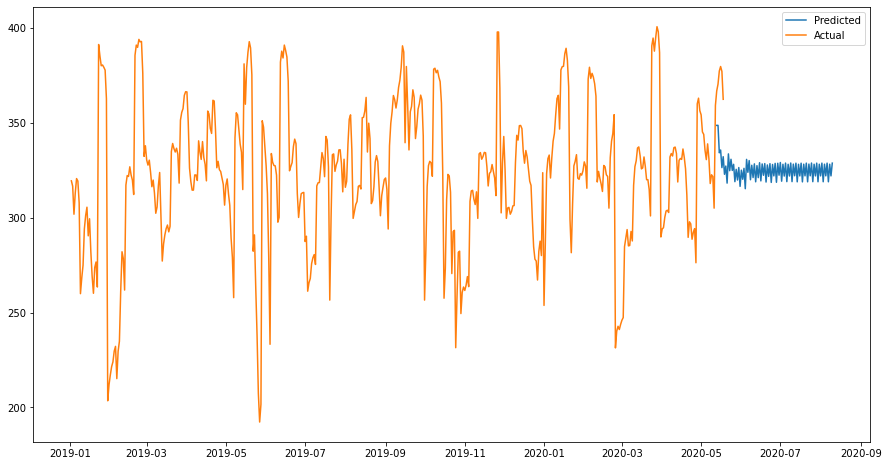

In [35]:
plt.figure(figsize = (15,8))
plt.plot(predictions, label = "Predicted")
plt.plot(q_ts,label = 'Actual')
plt.legend(loc = 'best')

In [36]:
sarimax = model_fit.fittedvalues

In [37]:
sarimax=np.array(sarimax)

In [38]:
q_ts_array=np.array(q_ts)

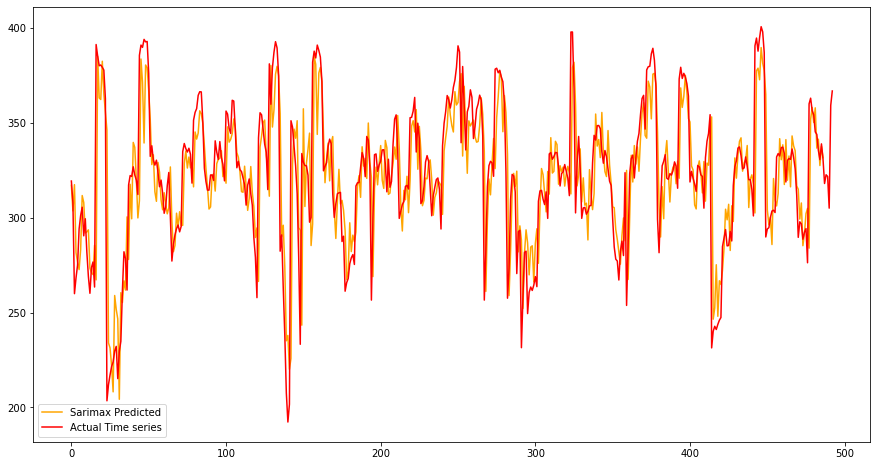

In [39]:
#Plotting and comparing the results
plt.figure(figsize = (15,8))
plt.plot(sarimax[5:-5], label = "Sarimax Predicted",color = 'orange')
plt.plot(q_ts_array[5:-5],label = 'Actual Time series',color = 'Red')
plt.legend(loc = 'best')